# Fase 4: Busca de Parâmetros

Nesta fase iremos aprofundar a busca de hiperparamewtros, variabndo os parametros ca cada modelos, e compaerandos seus resultados

O primeiro passo que iremos fazer é importar as bibliotecas principais, e estabelecer o ambiente de execução.


In [1]:
# Bibliotecas Externas
import os
import warnings
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Ignorando Warnings
warnings.filterwarnings("ignore")

# Bibliotecas Locais
os.chdir("../..")
from lib import plots, runner

# Definido Variáveis globais
N_SPLITS = 5
RANDOM_STATE = 51

## 0. Importando os Dados

Nosso primero é coletar os dados que preparamos na etapa anterior, para verificar como esses dados se comportam

In [2]:
# Conjunto de treino
X_train = pd.read_csv('./data/processed/X_train.csv')
Y_train = pd.read_csv('./data/processed/Y_train.csv')

Y_train['class'] = Y_train['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de validação
X_val = pd.read_csv('./data/processed/X_val.csv')
Y_val = pd.read_csv('./data/processed/Y_val.csv')


Y_val['class'] = Y_val['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de teste
X_test = pd.read_csv('./data/processed/X_test.csv')
Y_test = pd.read_csv('./data/processed/Y_test.csv')

Y_test['class'] = Y_test['class'].apply(lambda val: 1 if val == 'UP' else 0)

## 1. Algoritmos de Machine Learning para Classificação

### KNN

In [3]:
knn = KNeighborsClassifier()

In [4]:
param_distributions_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [5]:
df_knn, model_knn, params_knn = runner.search_params(
    model=knn,
    params=param_distributions_knn,
    X_train=X_train,
    Y_train=Y_train,
    max_combinations=100
)

Num combinações de hiperparâmetros: 30
Iniciando busca por hiperparâmetros...
Melhor conjunto de hiperparâmetros encontrado: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'}
Tempo de busca: 4.19s


Cross-Validation (5-folds): 100%|██████████| 5/5 [00:02<00:00,  2.23it/s]


In [6]:
df_knn

,K_,AUC_test,AUC_train,Accuracy_test,Accuracy_train,F1_Score_test,F1_Score_train,Recall_test,Recall_train,FPR_test,TPR_test
1,2,0.803106,1.0,0.810707,1.0,0.769710,1.0,0.756740,1.0,"[0.0, 0.1505281690140845, 1.0]","[0.0, 0.7567401960784313, 1.0]"
4,5,0.801073,1.0,0.810707,1.0,0.766213,1.0,0.742489,1.0,"[0.0, 0.14034315882094148, 1.0]","[0.0, 0.7424892703862661, 1.0]"
2,3,0.798866,1.0,0.807633,1.0,0.764059,1.0,0.745555,1.0,"[0.0, 0.14782226132864057, 1.0]","[0.0, 0.7455548743102391, 1.0]"
0,1,0.796344,1.0,0.807170,1.0,0.759962,1.0,0.730392,1.0,"[0.0, 0.13770347558293006, 1.0]","[0.0, 0.7303921568627451, 1.0]"
3,4,0.787350,1.0,0.798156,1.0,0.749204,1.0,0.721643,1.0,"[0.0, 0.1469423669159701, 1.0]","[0.0, 0.7216431637032495, 1.0]"


In [7]:
runner.save_model(model_knn, "knn")
runner.save_results(df_knn, "knn")

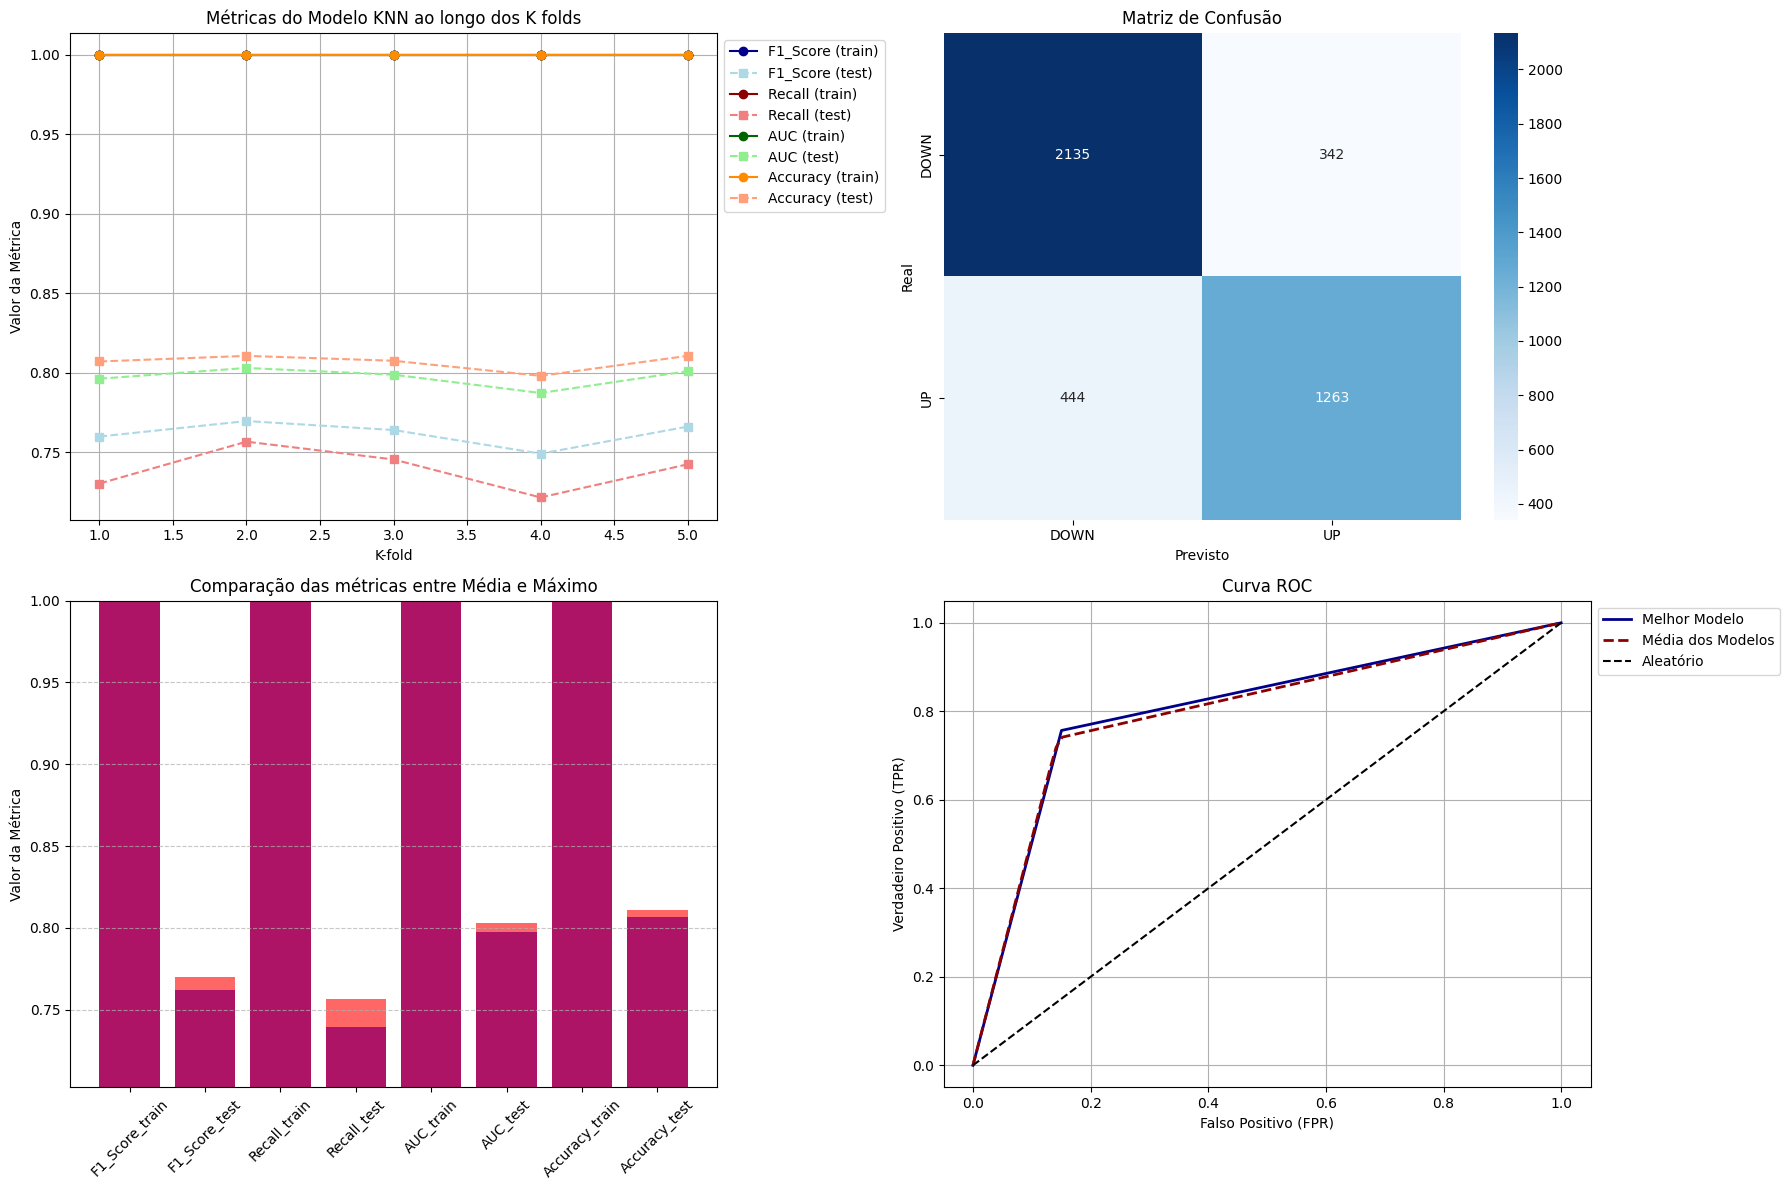

In [8]:
plots.model_evaluate(model_knn, df_knn, X_test, Y_test, model_name="KNN")